# Unknown 1776 text data set

In this text mining analysis, I will mine the text data called 1776paid.txt to summarise the purpose of the data text.

## Data Cleaning 

First, we upload the packages and the text data to start cleaning the data. 

In [1]:
library(SnowballC)
library(tm)
library(wordcloud)

Warning message:
"package 'SnowballC' was built under R version 3.6.3"Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP
Warning message:
"package 'wordcloud' was built under R version 3.6.3"Loading required package: RColorBrewer


In [4]:
text <- readLines("OneDrive/Documents/Big Data Module/01/Project #1/1776paid.txt")

Warning message in readLines("OneDrive/Documents/Big Data Module/01/Project #1/1776paid.txt"):
"incomplete final line found on 'OneDrive/Documents/Big Data Module/01/Project #1/1776paid.txt'"

In [5]:
docs <- Corpus(VectorSource(text)) 
inspect(docs) 

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 72

 [1]                        THE PRICE THEY PAID                         
 [2]                                                                    
 [3] Have you ever wondered what happened to the 56 men who signed the  
 [4] Declaration of Independence?                                       
 [5]                                                                    
 [6] Five signers were captured by the British as traitors, and tortured
 [7] before they died. Twelve had their homes ransacked and burned. Two 
 [8] lost their sons in the revolutionary army, another had two sons    
 [9] captured. Nine of the 56 fought and died from wounds or hardships  
[10] of the revolutionary war.                                          
[11]                                                                    
[12] They signed and they pledged their lives, their fortunes, and their
[13] sacred honor.     

We see that this text data set is not ready to be used for data mining, so we need to clean it out. What we do below is:

1. We transform upper cases to lower cases
2. Remove any numbers in the text data
3. Removes any stop words as they are pointless in data mining
4. Removes any punctuation as they could separate the same words causing inaccurate analysis.
5. Remove any double spaces as this could separate the same words causing inaccurate analysis. 

In [6]:
docs <- tm_map(docs, content_transformer(tolower))
docs <- tm_map(docs, removeNumbers)
docs <- tm_map(docs, removeWords, stopwords("english")) 
docs <- tm_map(docs, removePunctuation) 
docs <- tm_map(docs, stripWhitespace) 

Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
"transformation drops documents"Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
"transformation drops documents"

## Data mining 

Now that we have cleaned the data, we need to summarise the information in a table, by putting it into a table I can determine how many times each word appeares in each line of text.

In [7]:
dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)  
m 

,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
paid,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
price,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ever,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
happened,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
men,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
signed,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
wondered,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
declaration,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
independence,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
british,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We see this is a very large dataset, however it is easier to analyse compared to its original form. 

What we will do next is calculate the sum of the values in each row, which will tell us how many times each word appears in total. 

In [8]:
v <- sort(rowSums(m), decreasing = TRUE) 
d <- data.frame(word = names(v), freq = v)
head(d, 20)

,word,freq
british,british,6
died,died,6
home,home,5
men,men,4
signed,signed,3
declaration,declaration,3
captured,captured,3
revolutionary,revolutionary,3
lives,lives,3
properties,properties,3


Given all words are relevant in this context, a word cloud is now needed to display the most common words.

Warning message in wordcloud(words = d$word, freq = d$freq, min.freq = 1, max.words = 200, :
"amendment could not be fit on page. It will not be plotted."Warning message in wordcloud(words = d$word, freq = d$freq, min.freq = 1, max.words = 200, :
"frankly could not be fit on page. It will not be plotted."Warning message in wordcloud(words = d$word, freq = d$freq, min.freq = 1, max.words = 200, :
"granted could not be fit on page. It will not be plotted."Warning message in wordcloud(words = d$word, freq = d$freq, min.freq = 1, max.words = 200, :
"peace could not be fit on page. It will not be plotted."Warning message in wordcloud(words = d$word, freq = d$freq, min.freq = 1, max.words = 200, :
"hildreth could not be fit on page. It will not be plotted."

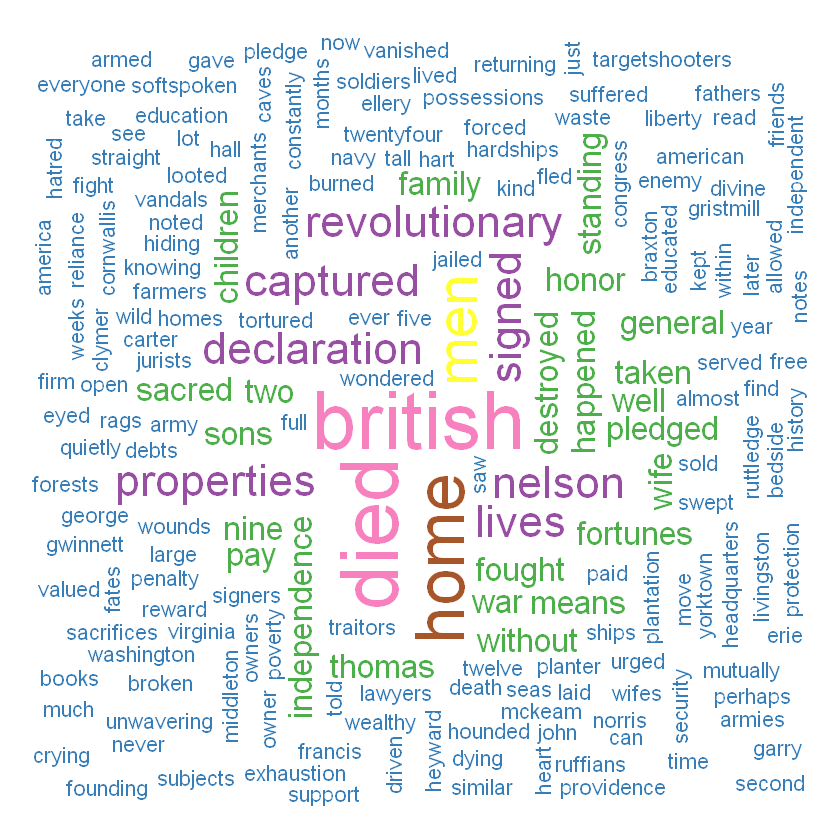

In [9]:
wordcloud(words = d$word, freq = d$freq, min.freq = 1, max.words = 200, random.order = FALSE, rot.per = 0.35, colors = brewer.pal(8, "Set1"))

## Conclusion

In the diagram above, we see that common words are British, died, home , war, men, captured, Nelson. This shows that this was a bloody war involving the British and Nelson, looking into the text data it seems to be Thomas Nelson Jr. which is a founding member of USA. This concludes this text data is about the 1776 American Civil War. 